In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('./data/train_bcra.csv')

In [20]:
df.head()

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA
0,2023-06-25,NaN,NaN
1,2023-02-11,NaN,NaN
2,2024-02-03,NaN,NaN
3,2024-04-01,NaN,NaN
4,2023-02-25,NaN,NaN


In [21]:
#print dataframe columns
print(df.columns)

Index(['DATE', 'TASA_POLITICA_MONETARIA_NA', 'TASA_DEPOSITOS_30D_NA'], dtype='object')


In [22]:
#Vemos los tipos de datos de las columnas
df.dtypes

DATE                           object
TASA_POLITICA_MONETARIA_NA    float64
TASA_DEPOSITOS_30D_NA         float64
dtype: object

In [23]:
# Convertimos la columna DATE a tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE                          datetime64[ns]
TASA_POLITICA_MONETARIA_NA           float64
TASA_DEPOSITOS_30D_NA                float64
dtype: object

In [24]:
# Analizamos la totalidad de los datos
df.describe()

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA
count,517,345.000000,345.000000
mean,2023-09-17 00:00:00,94.046377,90.789942
min,2023-01-02 00:00:00,40.000000,30.180000
25%,2023-05-11 00:00:00,75.000000,70.830000
50%,2023-09-17 00:00:00,97.000000,92.800000
75%,2024-01-24 00:00:00,100.000000,109.400000
max,2024-06-01 00:00:00,133.000000,130.420000
std,NaN,23.245733,25.277037


In [25]:
# Veamos algunos registros
df[['DATE','TASA_POLITICA_MONETARIA_NA','TASA_DEPOSITOS_30D_NA']].sort_values(by='DATE')

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA
359,2023-01-02,75.0,68.67
364,2023-01-03,75.0,70.46
357,2023-01-04,75.0,70.83
363,2023-01-05,75.0,70.25
360,2023-01-06,75.0,70.78
...,...,...,...
352,2024-05-28,40.0,31.17
339,2024-05-29,40.0,31.46
351,2024-05-30,40.0,32.18
346,2024-05-31,40.0,31.00


In [26]:
# Cuantos nulos hay en cada columna
df.isnull().sum()

DATE                            0
TASA_POLITICA_MONETARIA_NA    172
TASA_DEPOSITOS_30D_NA         172
dtype: int64

In [27]:
# Veamos a que día de la semana corresponden los nulls
df[df['TASA_POLITICA_MONETARIA_NA'].isnull()]['DATE'].dt.dayofweek.value_counts()

DATE
5    74
6    73
0    11
4     6
1     4
3     3
2     1
Name: count, dtype: int64

In [28]:
# La mayoría son sábados y domingos, y el resto?

# Agregamos una columna con el día de la semana
df['day_of_week'] = df['DATE'].dt.dayofweek

# Veamos los registros que son nulls y no son sábados ni domingos
df[(df['TASA_POLITICA_MONETARIA_NA'].isnull()) & (df['day_of_week']!=5) & (df['day_of_week']!=6)]

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA,day_of_week
3,2024-04-01,NaN,NaN,0
6,2023-05-01,NaN,NaN,0
10,2024-03-29,NaN,NaN,4
24,2023-08-21,NaN,NaN,0
28,2023-04-07,NaN,NaN,4
35,2024-02-13,NaN,NaN,1
40,2023-02-21,NaN,NaN,1
42,2023-02-20,NaN,NaN,0
47,2024-02-12,NaN,NaN,0
51,2023-12-08,NaN,NaN,4


In [29]:
# Son feriados! 
# Entonces, podríamos quitar los nulos de nuestro dataframe
df = df.dropna()
df.isnull().sum()

DATE                          0
TASA_POLITICA_MONETARIA_NA    0
TASA_DEPOSITOS_30D_NA         0
day_of_week                   0
dtype: int64

In [30]:
df = df.sort_values(by='DATE')

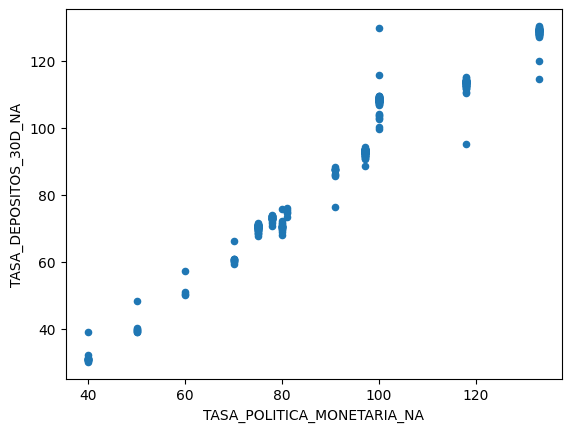

In [31]:
# Scatter plot between two columns
import matplotlib.pyplot as plt
df.plot.scatter(x='TASA_POLITICA_MONETARIA_NA', y='TASA_DEPOSITOS_30D_NA')
plt.show()

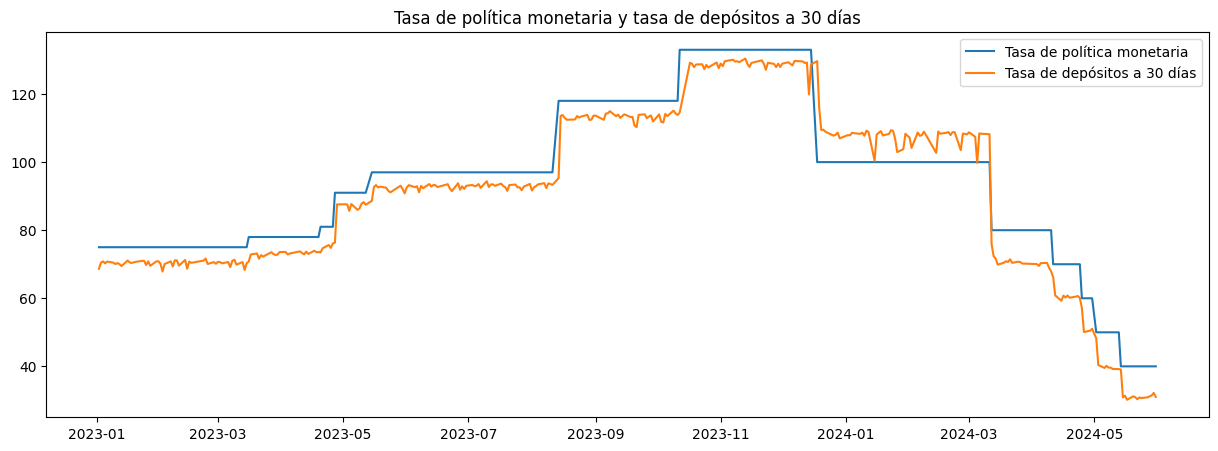

In [32]:
# Veamos las series temporales
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['DATE'],df['TASA_POLITICA_MONETARIA_NA'])
plt.plot(df['DATE'],df['TASA_DEPOSITOS_30D_NA'])
plt.title('Tasa de política monetaria y tasa de depósitos a 30 días')
plt.legend(['Tasa de política monetaria','Tasa de depósitos a 30 días'])
plt.show()

In [33]:
# Hagamos una regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = df['TASA_POLITICA_MONETARIA_NA'].values.reshape(-1,1)
y = df['TASA_DEPOSITOS_30D_NA'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [34]:
#print X_train and y_train number of rows
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(276, 1)
(276, 1)
(69, 1)
(69, 1)


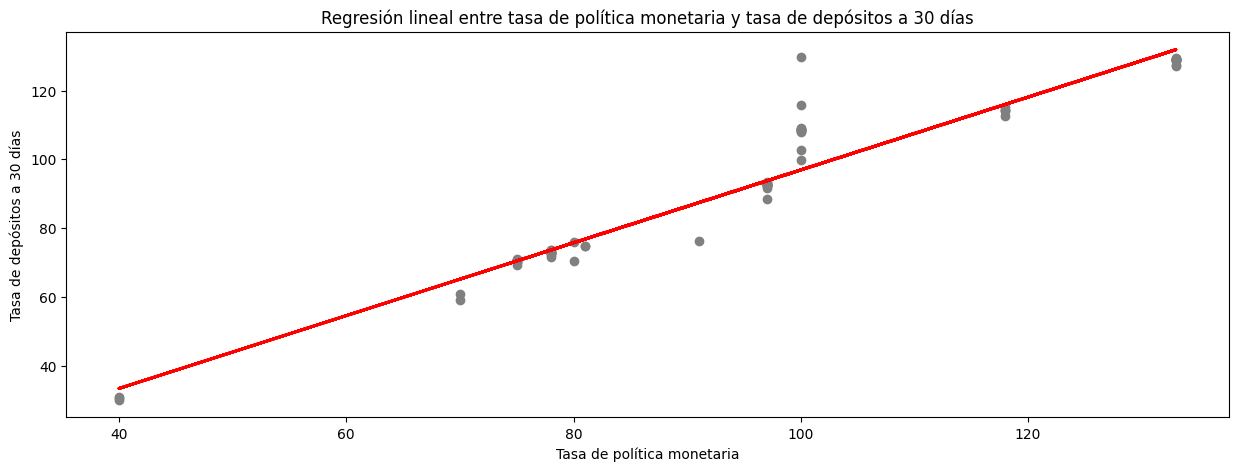

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión lineal entre tasa de política monetaria y tasa de depósitos a 30 días')
plt.xlabel('Tasa de política monetaria')
plt.ylabel('Tasa de depósitos a 30 días')
plt.show()


In [36]:
# Veamos las métricas
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.04112246104628
Mean Squared Error: 45.238016748577685
Root Mean Squared Error: 6.725921256495476


In [37]:
# Veamos la performance del modelo en el dataset de test
df_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_test.head()





,Actual,Predicted
0,92.58,93.757442
1,70.06,70.480483
2,72.82,73.654614
3,30.68,33.448958
4,71.63,73.654614


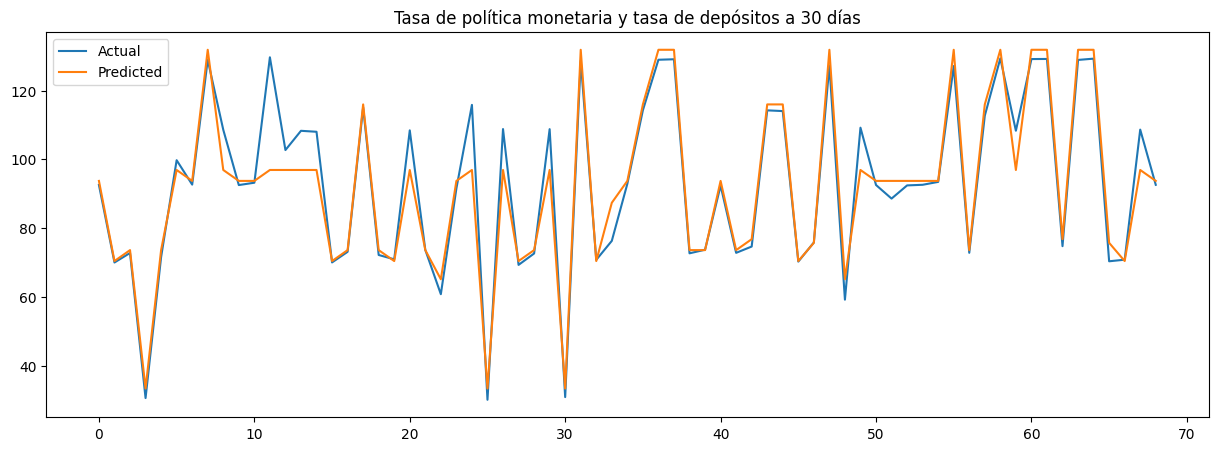

In [38]:
# Veamos las predicciones vs los valores reales en un grafico de lineas
plt.figure(figsize=(15,5))
plt.plot(df_test['Actual'])
plt.plot(df_test['Predicted'])
plt.title('Tasa de política monetaria y tasa de depósitos a 30 días')
plt.legend(['Actual','Predicted'])
plt.show()

# Exportar el modelo

In [39]:
#Export linear regression model to a pickle file
import pickle
# save the model to disk
filename = 'linear_regression_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [40]:
# Make prediction for a new value
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
new_value = 30
new_value = np.array(new_value).reshape(-1,1)
print(new_value)
result = loaded_model.predict(new_value)
print(result)

[[30]]
[[22.86852194]]
